In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os
from datetime import datetime

pd.set_option('display.max_columns', 100)

# First look

## Functions

In [2]:
def firstlook(filepath, **kwargs): # -> tuple[pd.DataFrame, list]: # python version ?
    """
    print out number of records, number of columns, id columns, number of unique rows based on id columns
    
    return `pandas dataframe, id columns`
    """

    df = pd.read_pickle(filepath, **kwargs)
    print('(Number of records, number of columns):', df.shape)
    id_cols = [col for col in df.columns if 'id' in col]
    print('Number of unique rows:', df.shape[0] - df[id_cols].duplicated().sum())
    print('Key columns:', *id_cols)
    return df, id_cols


def columns_filter(df:pd.DataFrame, retained_cols: list=[], excepted_cols:list = [], thres=50, output_filepath='columns_filter.txt', filemode='w') -> list:
    """
    return list of meaningful columns including `retained_cols` and excluding `excepted_cols`
    
    A meaningful column is a column that has more than 1 value and in the case of an object column has less than `thres` values.
    """
    outputfile = open(output_filepath, filemode)
    outputfile.write('------------\n'+datetime.now().strftime('%Y-%m-%d'))
    meaningful_cols = retained_cols.copy()
    for col in df.columns:
        if col in retained_cols:
            continue
        elif col in excepted_cols:
            print('Excepted column', col)
            outputfile.write('\nExcepted column ' + col)
            continue
        else:
            nunique = df[col].nunique()
            if nunique == 1:
                print(f'{col} only has 1 value')
                outputfile.write(f'\n{col} only has 1 value')
                continue
            if df[col].dtype == 'object':
                if nunique > thres:
                    print(f'{col} is an object column but has {nunique} values')
                    outputfile.write(f'\n{col} is an object column but has {nunique} values')
                    continue
            meaningful_cols.append(col)
    outputfile.close()
    return meaningful_cols

## RA Dataframe (race details)

In [3]:
print('--------\nHistorical data:')
RA_df, RA_id_cols = firstlook('../data/historical_data/RA.pickle')
print('--------\nNew data:')
RA_new_df, RA_id_new_cols = firstlook('../data/new_data/RA2.pickle')

--------
Historical data:
(Number of records, number of columns): (35925, 115)
Number of unique rows: 35925
Key columns: id$Year id$MonthDay id$JyoCD id$Kaiji id$Nichiji id$RaceNum
--------
New data:
(Number of records, number of columns): (1, 115)
Number of unique rows: 1
Key columns: id$Year id$MonthDay id$JyoCD id$Kaiji id$Nichiji id$RaceNum


In [4]:
RA_df.head(2)

,filename,line_no,head$RecordSpec,head$DataKubun,head$MakeDate$Year,head$MakeDate$Month,head$MakeDate$Day,id$Year,id$MonthDay,id$JyoCD,id$Kaiji,id$Nichiji,id$RaceNum,RaceInfo$YoubiCD,RaceInfo$TokuNum,RaceInfo$Hondai,RaceInfo$Fukudai,RaceInfo$Kakko,RaceInfo$HondaiEng,RaceInfo$FukudaiEng,RaceInfo$KakkoEng,RaceInfo$Ryakusyo10,RaceInfo$Ryakusyo6,RaceInfo$Ryakusyo3,RaceInfo$Kubun,RaceInfo$Nkai,GradeCD,GradeCDBefore,JyokenInfo$SyubetuCD,JyokenInfo$KigoCD,JyokenInfo$JyuryoCD,JyokenInfo$JyokenCD$1,JyokenInfo$JyokenCD$2,JyokenInfo$JyokenCD$3,JyokenInfo$JyokenCD$4,JyokenInfo$JyokenCD$5,JyokenName,Kyori,KyoriBefore,TrackCD,TrackCDBefore,CourseKubunCD,CourseKubunCDBefore,Honsyokin$1,Honsyokin$2,Honsyokin$3,Honsyokin$4,Honsyokin$5,Honsyokin$6,Honsyokin$7,...,TorokuTosu,SyussoTosu,NyusenTosu,TenkoBaba$TenkoCD,TenkoBaba$SibaBabaCD,TenkoBaba$DirtBabaCD,LapTime$1,LapTime$2,LapTime$3,LapTime$4,LapTime$5,LapTime$6,LapTime$7,LapTime$8,LapTime$9,LapTime$10,LapTime$11,LapTime$12,LapTime$13,LapTime$14,LapTime$15,LapTime$16,LapTime$17,LapTime$18,LapTime$19,LapTime$20,LapTime$21,LapTime$22,LapTime$23,LapTime$24,LapTime$25,SyogaiMileTime,HaronTimeS3,HaronTimeS4,HaronTimeL3,HaronTimeL4,CornerInfo$1$Corner,CornerInfo$1$Syukaisu,CornerInfo$1$Jyuni,CornerInfo$2$Corner,CornerInfo$2$Syukaisu,CornerInfo$2$Jyuni,CornerInfo$3$Corner,CornerInfo$3$Syukaisu,CornerInfo$3$Jyuni,CornerInfo$4$Corner,CornerInfo$4$Syukaisu,CornerInfo$4$Jyuni,RecordUpKubun,crlf
175817,RAVM2008019920171102153924.json,1,RA,7,2008,1,7,2008,105,06,1,1,1,1,0,,,,...,...,...,,,,0,0,,,12,023,3,0,703,0,0,703,,1200,0,24,0,,,50000,20000,13000,7500,5000,0,0,...,16,16,16,2,0,1,123,108,116,126,128,138,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,347,473,392,508,3,1,"(*2,7)(11,12)(1,6,14)(8,15)(5,16)10(3,13)4-9 ...",4,1,"(*2,7)12(1,6,14)5(3,8,15)(4,11,10,16)13-9 ...",0,0,...,0,0,...,0,\r\n
175829,RAVM2008019920171102153924.json,13,RA,7,2008,1,7,2008,105,08,1,1,1,1,0,,,,...,...,...,,,,0,0,,,12,003,3,0,703,0,0,703,,1800,0,24,0,,,50000,20000,13000,7500,5000,0,0,...,16,16,16,1,0,1,122,113,131,132,129,128,126,124,128,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,366,498,378,506,1,1,"2,8,12(4,11)3,9(1,7,15,16)(6,14)(5,13)10 ...",2,1,"2,8,12(4,11)3,9,7(1,15,16)-(5,6,14)13,10 ...",3,1,"2,8,12(3,4,11)-(7,9)(1,15)-(6,14,16,13)(5,10) ...",4,1,"2-(3,8,12)(4,11)-7,1(9,13)15-6(14,10)5-16 ...",0,\r\n


In [5]:
RA_new_df.head()

,filename,line_no,head$RecordSpec,head$DataKubun,head$MakeDate$Year,head$MakeDate$Month,head$MakeDate$Day,id$Year,id$MonthDay,id$JyoCD,id$Kaiji,id$Nichiji,id$RaceNum,RaceInfo$YoubiCD,RaceInfo$TokuNum,RaceInfo$Hondai,RaceInfo$Fukudai,RaceInfo$Kakko,RaceInfo$HondaiEng,RaceInfo$FukudaiEng,RaceInfo$KakkoEng,RaceInfo$Ryakusyo10,RaceInfo$Ryakusyo6,RaceInfo$Ryakusyo3,RaceInfo$Kubun,RaceInfo$Nkai,GradeCD,GradeCDBefore,JyokenInfo$SyubetuCD,JyokenInfo$KigoCD,JyokenInfo$JyuryoCD,JyokenInfo$JyokenCD$1,JyokenInfo$JyokenCD$2,JyokenInfo$JyokenCD$3,JyokenInfo$JyokenCD$4,JyokenInfo$JyokenCD$5,JyokenName,Kyori,KyoriBefore,TrackCD,TrackCDBefore,CourseKubunCD,CourseKubunCDBefore,Honsyokin$1,Honsyokin$2,Honsyokin$3,Honsyokin$4,Honsyokin$5,Honsyokin$6,Honsyokin$7,...,TorokuTosu,SyussoTosu,NyusenTosu,TenkoBaba$TenkoCD,TenkoBaba$SibaBabaCD,TenkoBaba$DirtBabaCD,LapTime$1,LapTime$2,LapTime$3,LapTime$4,LapTime$5,LapTime$6,LapTime$7,LapTime$8,LapTime$9,LapTime$10,LapTime$11,LapTime$12,LapTime$13,LapTime$14,LapTime$15,LapTime$16,LapTime$17,LapTime$18,LapTime$19,LapTime$20,LapTime$21,LapTime$22,LapTime$23,LapTime$24,LapTime$25,SyogaiMileTime,HaronTimeS3,HaronTimeS4,HaronTimeL3,HaronTimeL4,CornerInfo$1$Corner,CornerInfo$1$Syukaisu,CornerInfo$1$Jyuni,CornerInfo$2$Corner,CornerInfo$2$Syukaisu,CornerInfo$2$Jyuni,CornerInfo$3$Corner,CornerInfo$3$Syukaisu,CornerInfo$3$Jyuni,CornerInfo$4$Corner,CornerInfo$4$Syukaisu,CornerInfo$4$Jyuni,RecordUpKubun,crlf
1,RADW2018121520181214112906.json,1,RA,2,2018,12,14,2018,1215,6,5,5,1,1,0,,,,...,...,...,,,,0,0,,,11,023,3,703,0,0,0,703,,1200,0,24,0,,,50000,20000,13000,7500,5000,0,0,...,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,...,0,0,...,0,0,...,0,\r\n


In [6]:
RA_df.info(max_cols=200)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35925 entries, 175817 to 7725
Data columns (total 115 columns):
 #    Column                 Non-Null Count  Dtype 
---   ------                 --------------  ----- 
 0    filename               35925 non-null  object
 1    line_no                35925 non-null  int64 
 2    head$RecordSpec        35925 non-null  object
 3    head$DataKubun         35925 non-null  object
 4    head$MakeDate$Year     35925 non-null  int64 
 5    head$MakeDate$Month    35925 non-null  int64 
 6    head$MakeDate$Day      35925 non-null  int64 
 7    id$Year                35925 non-null  int64 
 8    id$MonthDay            35925 non-null  int64 
 9    id$JyoCD               35925 non-null  object
 10   id$Kaiji               35925 non-null  int64 
 11   id$Nichiji             35925 non-null  int64 
 12   id$RaceNum             35925 non-null  int64 
 13   RaceInfo$YoubiCD       35925 non-null  int64 
 14   RaceInfo$TokuNum       35925 non-null  int64 
 1

It seems dtypes are correct.

In [7]:
# 'id$Kaiji' and 'id$Nichiji' are not necessary
RA_id_cols = ['id$Year', 'id$MonthDay', 'id$JyoCD', 'id$RaceNum']
RA_excepted_cols = ['id$Kaiji', 'id$Nichiji', 'head$MakeDate$Year', 'head$MakeDate$Month', 'head$MakeDate$Day','line_no'] + [col for col in RA_df.columns if 'Before' in col or 'Time' in col or 'Corner' in col] 
RA_cols = columns_filter(RA_df, retained_cols=RA_id_cols, output_filepath='RA_cols_filter.txt', excepted_cols=RA_excepted_cols)

filename is an object column but has 130 values
Excepted column line_no
head$RecordSpec only has 1 value
head$DataKubun only has 1 value
Excepted column head$MakeDate$Year
Excepted column head$MakeDate$Month
Excepted column head$MakeDate$Day
Excepted column id$Kaiji
Excepted column id$Nichiji
RaceInfo$Hondai is an object column but has 1482 values
RaceInfo$Fukudai is an object column but has 118 values
RaceInfo$HondaiEng is an object column but has 1498 values
RaceInfo$FukudaiEng is an object column but has 106 values
RaceInfo$Ryakusyo10 is an object column but has 1445 values
RaceInfo$Ryakusyo6 is an object column but has 1428 values
RaceInfo$Ryakusyo3 is an object column but has 1410 values
Excepted column GradeCDBefore
JyokenName only has 1 value
Excepted column KyoriBefore
Excepted column TrackCDBefore
Excepted column CourseKubunCDBefore
Honsyokin$7 only has 1 value
Excepted column HonsyokinBefore$1
Excepted column HonsyokinBefore$2
Excepted column HonsyokinBefore$3
Excepted column

## SE dataframe (horse information in each race)

In [35]:
print('--------\nHistorical data:')
SE_df, SE_id_cols = firstlook('../data/historical_data/SE.pickle')
print('--------\nNew data:')
SE_new_df, SE_id_new_cols = firstlook('../data/new_data/SE2.pickle')

--------
Historical data:
(Number of records, number of columns): (525663, 78)
Number of unique rows: 36639
Key columns: id$Year id$MonthDay id$JyoCD id$Kaiji id$Nichiji id$RaceNum
--------
New data:
(Number of records, number of columns): (16, 78)
Number of unique rows: 1
Key columns: id$Year id$MonthDay id$JyoCD id$Kaiji id$Nichiji id$RaceNum


In [22]:
SE_df.head(2)

,filename,line_no,head$RecordSpec,head$DataKubun,head$MakeDate$Year,head$MakeDate$Month,head$MakeDate$Day,id$Year,id$MonthDay,id$JyoCD,id$Kaiji,id$Nichiji,id$RaceNum,Wakuban,Umaban,KettoNum,Bamei,UmaKigoCD,SexCD,HinsyuCD,KeiroCD,Barei,TozaiCD,ChokyosiCode,ChokyosiRyakusyo,BanusiCode,BanusiName,Fukusyoku,reserved1,Futan,FutanBefore,Blinker,reserved2,KisyuCode,KisyuCodeBefore,KisyuRyakusyo,KisyuRyakusyoBefore,MinaraiCD,MinaraiCDBefore,BaTaijyu,ZogenFugo,ZogenSa,IJyoCD,NyusenJyuni,KakuteiJyuni,DochakuKubun,DochakuTosu,Time,ChakusaCD,ChakusaCDP,ChakusaCDPP,Jyuni1c,Jyuni2c,Jyuni3c,Jyuni4c,Odds,Ninki,Honsyokin,Fukasyokin,reserved3,reserved4,HaronTimeL4,HaronTimeL3,ChakuUmaInfo$1$KettoNum,ChakuUmaInfo$1$Bamei,ChakuUmaInfo$2$KettoNum,ChakuUmaInfo$2$Bamei,ChakuUmaInfo$3$KettoNum,ChakuUmaInfo$3$Bamei,TimeDiff,RecordUpKubun,DMKubun,DMTime,DMGosaP,DMGosaM,DMJyuni,KyakusituKubun,crlf
1554625,SEVM2008019920171102153925.json,1,SE,7,2008,1,7,2008,105,6,1,1,1,1,1,2005107051,エイトシード,0,2,1,3,3,1,437,南田美知,898009,玉置 辰次,桃，赤襷，鼠袖,,540,0,0,0,1031,0,村田一誠,,0,0,428,+,012,0,8,8,0,0,1152,112,,,0,0,5,4,298,9,0,0,0,0,0,401,2005102028,メジロアリエル,0,,0,,13,0,3,11578,0,0,9,2,\r\n
1554626,SEVM2008019920171102153925.json,2,SE,7,2008,1,7,2008,105,6,1,1,1,1,2,2005102028,メジロアリエル,0,2,1,3,3,1,138,大久保洋,498800,メジロ牧場,白，緑一本輪，袖緑縦縞,,540,0,0,0,733,0,吉田豊,,0,0,450,-,010,0,1,1,0,0,1139,,,,0,0,1,1,81,4,50000,0,0,0,0,392,2005101044,ヒロアンジェロ,0,,0,,0,0,3,11576,4,4,8,1,\r\n


In [23]:
SE_new_df.head(2)

,filename,line_no,head$RecordSpec,head$DataKubun,head$MakeDate$Year,head$MakeDate$Month,head$MakeDate$Day,id$Year,id$MonthDay,id$JyoCD,id$Kaiji,id$Nichiji,id$RaceNum,Wakuban,Umaban,KettoNum,Bamei,UmaKigoCD,SexCD,HinsyuCD,KeiroCD,Barei,TozaiCD,ChokyosiCode,ChokyosiRyakusyo,BanusiCode,BanusiName,Fukusyoku,reserved1,Futan,FutanBefore,Blinker,reserved2,KisyuCode,KisyuCodeBefore,KisyuRyakusyo,KisyuRyakusyoBefore,MinaraiCD,MinaraiCDBefore,BaTaijyu,ZogenFugo,ZogenSa,IJyoCD,NyusenJyuni,KakuteiJyuni,DochakuKubun,DochakuTosu,Time,ChakusaCD,ChakusaCDP,ChakusaCDPP,Jyuni1c,Jyuni2c,Jyuni3c,Jyuni4c,Odds,Ninki,Honsyokin,Fukasyokin,reserved3,reserved4,HaronTimeL4,HaronTimeL3,ChakuUmaInfo$1$KettoNum,ChakuUmaInfo$1$Bamei,ChakuUmaInfo$2$KettoNum,ChakuUmaInfo$2$Bamei,ChakuUmaInfo$3$KettoNum,ChakuUmaInfo$3$Bamei,TimeDiff,RecordUpKubun,DMKubun,DMTime,DMGosaP,DMGosaM,DMJyuni,KyakusituKubun,crlf
15,SEDW2018121520181214112906.json,1,SE,2,2018,12,14,2018,1215,6,5,5,1,1,1,2016104464,イベリスリーフ,0,2,1,1,2,1,1153,中舘英二,226800,サンデーレーシング,黒，赤十字襷，袖黄縦縞,,540,0,0,0,5568,0,アヴドゥ,,0,0,,,,0,0,0,0,0,0,,,,0,0,0,0,0,0,0,0,0,0,0,0,0,,0,,0,,0,0,0,0,0,0,0,0,\r\n
16,SEDW2018121520181214112906.json,2,SE,2,2018,12,14,2018,1215,6,5,5,1,1,2,2016105215,ベルポート,0,2,1,5,2,1,1102,大竹正博,364030,大社 聡,黒，赤襷，黄袖赤二本輪,,510,0,0,0,1158,0,野中悠太,,3,0,,,,0,0,0,0,0,0,,,,0,0,0,0,0,0,0,0,0,0,0,0,0,,0,,0,,0,0,0,0,0,0,0,0,\r\n


In [24]:
SE_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525663 entries, 1554625 to 635078
Data columns (total 78 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   filename                 525663 non-null  object
 1   line_no                  525663 non-null  int64 
 2   head$RecordSpec          525663 non-null  object
 3   head$DataKubun           525663 non-null  object
 4   head$MakeDate$Year       525663 non-null  int64 
 5   head$MakeDate$Month      525663 non-null  int64 
 6   head$MakeDate$Day        525663 non-null  int64 
 7   id$Year                  525663 non-null  int64 
 8   id$MonthDay              525663 non-null  int64 
 9   id$JyoCD                 525663 non-null  object
 10  id$Kaiji                 525663 non-null  int64 
 11  id$Nichiji               525663 non-null  int64 
 12  id$RaceNum               525663 non-null  int64 
 13  Wakuban                  525663 non-null  int64 
 14  Umaban        

BaTaijyu column has wrong data type

In [25]:
SE_df['BaTaijyu'] = pd.to_numeric(SE_df['BaTaijyu'], errors='coerce')
SE_df['BaTaijyu'].isna().sum()

0

In [26]:
# 'id$Kaiji' and 'id$Nichiji' are not necessary
SE_id_cols = ['id$Year', 'id$MonthDay', 'id$JyoCD', 'id$RaceNum']
SE_excepted_cols = [
# not necessary
'id$Kaiji', 'id$Nichiji', 'head$MakeDate$Year', 'head$MakeDate$Month', 'head$MakeDate$Day','line_no',
# can not use for prediction
'Jyuni1c','Jyuni2c','Jyuni3c','Jyuni4c', 'Odds', 
# has same meaning with another col
'ChakuUmaInfo$1$KettoNum', 'ChakuUmaInfo$2$KettoNum', 'ChakuUmaInfo$3$KettoNum'
] + [col for col in SE_df.columns if 'Before' in col or 'Time' in col]
target_cols = ['Time', 'KakuteiJyuni']
horse_jockey_id_cols = ['KettoNum', 'KisyuCode']
SE_cols = columns_filter(SE_df, retained_cols=SE_id_cols + horse_jockey_id_cols + target_cols, output_filepath='SE_cols_filter.txt', excepted_cols=SE_excepted_cols)

filename is an object column but has 143 values
Excepted column line_no
head$RecordSpec only has 1 value
head$DataKubun only has 1 value
Excepted column head$MakeDate$Year
Excepted column head$MakeDate$Month
Excepted column head$MakeDate$Day
Excepted column id$Kaiji
Excepted column id$Nichiji
Bamei is an object column but has 54552 values
ChokyosiRyakusyo is an object column but has 587 values
BanusiName is an object column but has 2776 values
Fukusyoku is an object column but has 2423 values
reserved1 only has 1 value
Excepted column FutanBefore
reserved2 only has 1 value
Excepted column KisyuCodeBefore
KisyuRyakusyo is an object column but has 470 values
Excepted column KisyuRyakusyoBefore
Excepted column MinaraiCDBefore
ChakusaCDPP only has 1 value
Excepted column Jyuni1c
Excepted column Jyuni2c
Excepted column Jyuni3c
Excepted column Jyuni4c
Excepted column Odds
reserved3 only has 1 value
reserved4 only has 1 value
Excepted column HaronTimeL4
Excepted column HaronTimeL3
Excepted co

## Weather data

In [27]:
print('--------\nHistorical data:')
WE_df, WE_id_cols = firstlook('../data/historical_data/WE.pickle')
print('--------\nNew data:')
WE_new_df, WE__new_id_cols = firstlook('../data/new_data/WE.pickle')

--------
Historical data:
(Number of records, number of columns): (18, 24)
Number of unique rows: 6
Key columns: id$Year id$MonthDay id$JyoCD id$Kaiji id$Nichiji
--------
New data:
(Number of records, number of columns): (4, 24)
Number of unique rows: 3
Key columns: id$Year id$MonthDay id$JyoCD id$Kaiji id$Nichiji


In [28]:
WE_df.head()

,filename,line_no,head$RecordSpec,head$DataKubun,head$MakeDate$Year,head$MakeDate$Month,head$MakeDate$Day,id$Year,id$MonthDay,id$JyoCD,id$Kaiji,id$Nichiji,HappyoTime$Month,HappyoTime$Day,HappyoTime$Hour,HappyoTime$Minute,HenkoID,TenkoBaba$TenkoCD,TenkoBaba$SibaBabaCD,TenkoBaba$DirtBabaCD,TenkoBabaBefore$TenkoCD,TenkoBabaBefore$SibaBabaCD,TenkoBabaBefore$DirtBabaCD,crlf
0,WE20180818.json,1,WE,1,2018,8,17,2018,818,1,2,1,0,0,0,0,1,1,1,3,0,0,0,\r\n
1,WE20180818.json,2,WE,1,2018,8,18,2018,818,1,2,1,8,18,6,30,2,2,0,0,1,0,0,\r\n
2,WE20180818.json,3,WE,1,2018,8,18,2018,818,1,2,1,8,18,8,0,2,1,0,0,2,0,0,\r\n
3,WE20180818.json,4,WE,1,2018,8,18,2018,818,1,2,1,8,18,10,6,3,0,1,2,0,1,3,\r\n
4,WE20180818.json,5,WE,1,2018,8,17,2018,818,4,2,7,0,0,0,0,1,2,2,3,0,0,0,\r\n


In [29]:
WE_new_df.head()

,filename,line_no,head$RecordSpec,head$DataKubun,head$MakeDate$Year,head$MakeDate$Month,head$MakeDate$Day,id$Year,id$MonthDay,id$JyoCD,id$Kaiji,id$Nichiji,HappyoTime$Month,HappyoTime$Day,HappyoTime$Hour,HappyoTime$Minute,HenkoID,TenkoBaba$TenkoCD,TenkoBaba$SibaBabaCD,TenkoBaba$DirtBabaCD,TenkoBabaBefore$TenkoCD,TenkoBabaBefore$SibaBabaCD,TenkoBabaBefore$DirtBabaCD,crlf
0,WE20181215.json,1,WE,1,2018,12,14,2018,1215,6,5,5,0,0,0,0,1,1,1,2,0,0,0,\r\n
1,WE20181215.json,2,WE,1,2018,12,14,2018,1215,7,4,5,0,0,0,0,1,1,1,2,0,0,0,\r\n
2,WE20181215.json,3,WE,1,2018,12,14,2018,1215,9,5,5,0,0,0,0,1,1,1,1,0,0,0,\r\n
3,WE20181215.json,4,WE,1,2018,12,15,2018,1215,9,5,5,12,15,7,35,2,2,0,0,1,0,0,\r\n


# Merge data

## Functions

In [38]:
def encode_raceid(return_date_only: bool = False): # -> str | pd.Timestamp: # python version >= 3.10
    """
    return race id following format `yyyy-mm-dd racenum:racetrackid`
    """
    def sub(row: pd.Series):

        # retrieve date
        year = str(row['id$Year'])
        month = str(row['id$MonthDay']//100)
        if len(month) < 2: month = '0' + month
        day = str(row['id$MonthDay']%100)
        if len(day) < 2: day = '0' + day

        if return_date_only:
            return pd.to_datetime(f'{year}-{month}-{day}')

        # retrieve race id
        racetrack_code = str(row['id$JyoCD'])
        if len(racetrack_code) < 2: racetrack_code = '0' + racetrack_code
        racenum = str(row['id$RaceNum'])
        if len(racenum) < 2: racenum = '0' + racenum
        
        return f'{year}-{month}-{day} {racenum}:{racetrack_code}'

    return sub


def decode_time(time):
    """
    return time in 100millisecond unit
    """
    minute = time//1000
    millisecond = time%1000
    return minute*600 + millisecond


def zogen_sign(row):
    if not row['ZogenSa'].isnumeric():
        return 0
    if int(row['ZogenSa']) == 999:
        return np.nan
    multiplier = 1 if '+' in row['ZogenFugo'] else -1
    return int(row['ZogenSa'])*multiplier 

## Encode race id

In [39]:
SE_lite_df = SE_df[SE_cols].copy()
SE_lite_df['raceid'] = SE_df.apply(encode_raceid(), axis=1)
SE_lite_df.drop(SE_id_cols, axis=1, inplace=True)

RA_lite_df = RA_df[RA_cols].copy()
RA_lite_df['raceid'] = RA_df.apply(encode_raceid(), axis=1)
RA_lite_df['racedate'] = RA_df.apply(encode_raceid(return_date_only=True), axis=1)
RA_lite_df.drop(RA_id_cols, axis=1, inplace=True)

In [42]:
# Number of races after encoding
SE_lite_df['raceid'].nunique(), RA_lite_df['raceid'].nunique()

(36285, 35925)

In [3]:
from matplotlib.patches import Rectangle

<ipython-input-5-c5f23af3c8be>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels=['RA', 'SE'],fontsize=15)


Text(0.5, 1.0, 'Number of races')

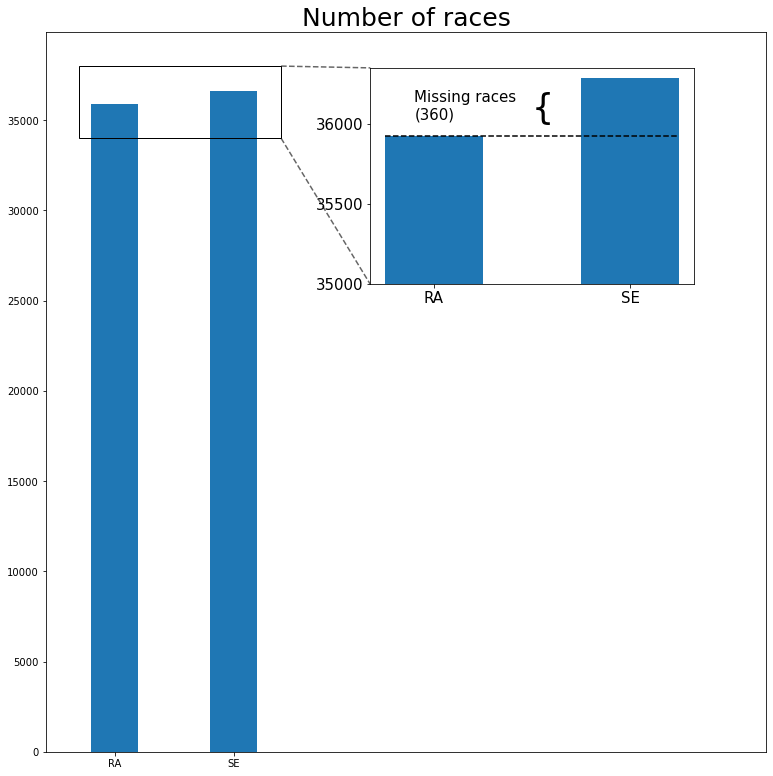

In [5]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_axes((0.,0.,1.,1.))
ax2 = fig.add_axes((0.45,0.65, 0.45, 0.3))
ax.bar(x=[1,2,3,4,5,6], height= [35925, 36639, 0, 0, 0, 0], width=0.4)
ax.set_yticks(ticks=np.arange(0, 45000, 5000))
ax.set_xticks(ticks=np.arange(1, 3, 1))
ax.set_xticklabels(labels=['RA', 'SE'])


# ax2
ax2.bar(x=['RA', 'SE'], height= [35925-35000, 36285-35000], width=0.5)
ax2.set_yticks(ticks=np.arange(0, 1500, 500))
ax2.set_yticklabels(labels=np.arange(35000, 36500, 500), fontsize=15)
ax2.set_xticklabels(labels=['RA', 'SE'],fontsize=15)
ax2.hlines(925,xmin=-0.25, xmax=1.25, colors='k', linestyles='--')
ax2.text(0.5,1030, '{', fontdict={'fontsize': 35})
ax2.text(-0.1,1030,'Missing races\n(360)',fontdict={'fontsize': 15})


ax.add_patch(Rectangle((0.7, 34000), 1.7, 4000,fc='none',
                        color ='k',
                        linewidth = 1))
ax.plot([2.4,3.15], [34000, 25900], '--', color='k', alpha=0.6)
ax.plot([2.4,3.15], [38000, 37900], '--', color='k', alpha=0.6)
ax.set_title('Number of races', fontdict={'fontsize': 25})

## Merge data

In [16]:
df_merged = pd.merge(SE_lite_df, RA_lite_df, left_on='raceid', right_on='raceid', how='left')
df_merged.drop('RecordUpKubun_y', axis=1, inplace=True)
df_merged.rename(columns={'RecordUpKubun_x': 'RecordUpKubun'}, inplace=True)
df_merged = df_merged[['raceid', 'racedate'] + [col for col in df_merged.columns if col not in ['raceid', 'racedate']]]

In [17]:
# Check the number of races that do not have performance information of horses.
raceid_ = df_merged['raceid'].unique()
RA_lite_df['raceid'].apply(lambda x: x not in raceid_).sum()

0

In [18]:
print(df_merged.shape)
df_merged.head(2)

(525663, 71)


,raceid,racedate,KettoNum,KisyuCode,Time,KakuteiJyuni,Wakuban,Umaban,UmaKigoCD,SexCD,HinsyuCD,KeiroCD,Barei,TozaiCD,ChokyosiCode,BanusiCode,Futan,Blinker,MinaraiCD,BaTaijyu,ZogenFugo,ZogenSa,IJyoCD,NyusenJyuni,DochakuKubun,DochakuTosu,ChakusaCD,ChakusaCDP,Ninki,Honsyokin,Fukasyokin,RecordUpKubun,DMGosaP,DMGosaM,DMJyuni,KyakusituKubun,RaceInfo$YoubiCD,RaceInfo$TokuNum,RaceInfo$Kakko,RaceInfo$KakkoEng,RaceInfo$Kubun,RaceInfo$Nkai,GradeCD,JyokenInfo$SyubetuCD,JyokenInfo$KigoCD,JyokenInfo$JyuryoCD,JyokenInfo$JyokenCD$1,JyokenInfo$JyokenCD$2,JyokenInfo$JyokenCD$3,JyokenInfo$JyokenCD$4,JyokenInfo$JyokenCD$5,Kyori,TrackCD,CourseKubunCD,Honsyokin$1,Honsyokin$2,Honsyokin$3,Honsyokin$4,Honsyokin$5,Honsyokin$6,Fukasyokin$1,Fukasyokin$2,Fukasyokin$3,Fukasyokin$4,Fukasyokin$5,TorokuTosu,SyussoTosu,NyusenTosu,TenkoBaba$TenkoCD,TenkoBaba$SibaBabaCD,TenkoBaba$DirtBabaCD
0,2008-01-05 01:06,2008-01-05,2005107051,1031,1152,8,1,1,0,2,1,3,3,1,437,898009,540,0,0,428,+,012,0,8,0,0,112,,9,0,0,0,0,0,9,2,1.0,0.0,,...,0.0,0.0,,12.0,023,3.0,0.0,703.0,0.0,0.0,703.0,1200.0,24.0,,50000.0,20000.0,13000.0,7500.0,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,16.0,16.0,2.0,0.0,1.0
1,2008-01-05 01:06,2008-01-05,2005102028,733,1139,1,1,2,0,2,1,3,3,1,138,498800,540,0,0,450,-,010,0,1,0,0,,,4,50000,0,0,4,4,8,1,1.0,0.0,,...,0.0,0.0,,12.0,023,3.0,0.0,703.0,0.0,0.0,703.0,1200.0,24.0,,50000.0,20000.0,13000.0,7500.0,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,16.0,16.0,2.0,0.0,1.0


## Process

In [19]:
nan_df = df_merged[df_merged['racedate'].isna()]
print(nan_df.shape)
print('Number of races with missing data:', nan_df['raceid'].nunique())
nan_df.sort_values('raceid').head(2)

(5165, 71)
Number of races with missing data: 360


,raceid,racedate,KettoNum,KisyuCode,Time,KakuteiJyuni,Wakuban,Umaban,UmaKigoCD,SexCD,HinsyuCD,KeiroCD,Barei,TozaiCD,ChokyosiCode,BanusiCode,Futan,Blinker,MinaraiCD,BaTaijyu,ZogenFugo,ZogenSa,IJyoCD,NyusenJyuni,DochakuKubun,DochakuTosu,ChakusaCD,ChakusaCDP,Ninki,Honsyokin,Fukasyokin,RecordUpKubun,DMGosaP,DMGosaM,DMJyuni,KyakusituKubun,RaceInfo$YoubiCD,RaceInfo$TokuNum,RaceInfo$Kakko,RaceInfo$KakkoEng,RaceInfo$Kubun,RaceInfo$Nkai,GradeCD,JyokenInfo$SyubetuCD,JyokenInfo$KigoCD,JyokenInfo$JyuryoCD,JyokenInfo$JyokenCD$1,JyokenInfo$JyokenCD$2,JyokenInfo$JyokenCD$3,JyokenInfo$JyokenCD$4,JyokenInfo$JyokenCD$5,Kyori,TrackCD,CourseKubunCD,Honsyokin$1,Honsyokin$2,Honsyokin$3,Honsyokin$4,Honsyokin$5,Honsyokin$6,Fukasyokin$1,Fukasyokin$2,Fukasyokin$3,Fukasyokin$4,Fukasyokin$5,TorokuTosu,SyussoTosu,NyusenTosu,TenkoBaba$TenkoCD,TenkoBaba$SibaBabaCD,TenkoBaba$DirtBabaCD
520498,2018-05-26 01:05,NaT,2015103987,1164,1436,14,1,1,0,3,1,1,3,1,1029,98700,530,0,3,468,-,012,0,14,0,0,T,,14,0,0,0,15,12,11,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
520513,2018-05-26 01:05,NaT,2015103465,1151,1439,15,8,16,0,1,1,4,3,1,1088,397030,550,1,1,510,-,002,0,15,0,0,134,,8,0,0,0,16,13,16,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
nan_df.sort_values('raceid').tail(2)

,raceid,racedate,KettoNum,KisyuCode,Time,KakuteiJyuni,Wakuban,Umaban,UmaKigoCD,SexCD,HinsyuCD,KeiroCD,Barei,TozaiCD,ChokyosiCode,BanusiCode,Futan,Blinker,MinaraiCD,BaTaijyu,ZogenFugo,ZogenSa,IJyoCD,NyusenJyuni,DochakuKubun,DochakuTosu,ChakusaCD,ChakusaCDP,Ninki,Honsyokin,Fukasyokin,RecordUpKubun,DMGosaP,DMGosaM,DMJyuni,KyakusituKubun,RaceInfo$YoubiCD,RaceInfo$TokuNum,RaceInfo$Kakko,RaceInfo$KakkoEng,RaceInfo$Kubun,RaceInfo$Nkai,GradeCD,JyokenInfo$SyubetuCD,JyokenInfo$KigoCD,JyokenInfo$JyuryoCD,JyokenInfo$JyokenCD$1,JyokenInfo$JyokenCD$2,JyokenInfo$JyokenCD$3,JyokenInfo$JyokenCD$4,JyokenInfo$JyokenCD$5,Kyori,TrackCD,CourseKubunCD,Honsyokin$1,Honsyokin$2,Honsyokin$3,Honsyokin$4,Honsyokin$5,Honsyokin$6,Fukasyokin$1,Fukasyokin$2,Fukasyokin$3,Fukasyokin$4,Fukasyokin$5,TorokuTosu,SyussoTosu,NyusenTosu,TenkoBaba$TenkoCD,TenkoBaba$SibaBabaCD,TenkoBaba$DirtBabaCD
525654,2018-07-01 12:07,NaT,2015104880,1088,1587,1,4,7,0,1,1,3,3,2,1061,398002,540,0,0,512,-,006,0,1,0,0,,,1,75000,0,0,98,97,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
525662,2018-07-01 12:07,NaT,2014106395,1122,2020,14,8,15,0,1,1,3,4,2,425,320030,570,0,0,520,-,002,0,14,0,0,Z,,14,0,0,0,69,99,13,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From 26 May 2018 to 1 July 2018, race information was unavailable.

In [21]:
# drop rows with nan values
# df_merged.dropna(axis=0, inplace=True)

# convert time to millisecond unit
df_merged['Time'] = df_merged['Time'].apply(decode_time)

# assign Zogen value
df_merged['Zogen'] = df_merged.apply(zogen_sign, axis=1)
df_merged.drop(['ZogenFugo', 'ZogenSa'],axis=1, inplace=True)

# Honsyokin (prize money)
df_merged['Honsyokin'] = df_merged['Honsyokin'] + df_merged['Fukasyokin']
df_merged.drop('Fukasyokin', axis=1, inplace=True)
print('Total nan value of Zogen column:',df_merged['Zogen'].isna().sum())


Total nan value of Zogen column: 339


In [22]:
print(df_merged.shape)
df_merged.head(2)

(525663, 69)


,raceid,racedate,KettoNum,KisyuCode,Time,KakuteiJyuni,Wakuban,Umaban,UmaKigoCD,SexCD,HinsyuCD,KeiroCD,Barei,TozaiCD,ChokyosiCode,BanusiCode,Futan,Blinker,MinaraiCD,BaTaijyu,IJyoCD,NyusenJyuni,DochakuKubun,DochakuTosu,ChakusaCD,ChakusaCDP,Ninki,Honsyokin,RecordUpKubun,DMGosaP,DMGosaM,DMJyuni,KyakusituKubun,RaceInfo$YoubiCD,RaceInfo$TokuNum,RaceInfo$Kakko,RaceInfo$KakkoEng,RaceInfo$Kubun,RaceInfo$Nkai,GradeCD,JyokenInfo$SyubetuCD,JyokenInfo$KigoCD,JyokenInfo$JyuryoCD,JyokenInfo$JyokenCD$1,JyokenInfo$JyokenCD$2,JyokenInfo$JyokenCD$3,JyokenInfo$JyokenCD$4,JyokenInfo$JyokenCD$5,Kyori,TrackCD,CourseKubunCD,Honsyokin$1,Honsyokin$2,Honsyokin$3,Honsyokin$4,Honsyokin$5,Honsyokin$6,Fukasyokin$1,Fukasyokin$2,Fukasyokin$3,Fukasyokin$4,Fukasyokin$5,TorokuTosu,SyussoTosu,NyusenTosu,TenkoBaba$TenkoCD,TenkoBaba$SibaBabaCD,TenkoBaba$DirtBabaCD,Zogen
0,2008-01-05 01:06,2008-01-05,2005107051,1031,752,8,1,1,0,2,1,3,3,1,437,898009,540,0,0,428,0,8,0,0,112,,9,0,0,0,0,9,2,1.0,0.0,,...,0.0,0.0,,12.0,023,3.0,0.0,703.0,0.0,0.0,703.0,1200.0,24.0,,50000.0,20000.0,13000.0,7500.0,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,16.0,16.0,2.0,0.0,1.0,12.0
1,2008-01-05 01:06,2008-01-05,2005102028,733,739,1,1,2,0,2,1,3,3,1,138,498800,540,0,0,450,0,1,0,0,,,4,50000,0,4,4,8,1,1.0,0.0,,...,0.0,0.0,,12.0,023,3.0,0.0,703.0,0.0,0.0,703.0,1200.0,24.0,,50000.0,20000.0,13000.0,7500.0,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,16.0,16.0,2.0,0.0,1.0,-10.0


In [23]:
df_merged.columns

Index(['raceid', 'racedate', 'KettoNum', 'KisyuCode', 'Time', 'KakuteiJyuni',
       'Wakuban', 'Umaban', 'UmaKigoCD', 'SexCD', 'HinsyuCD', 'KeiroCD',
       'Barei', 'TozaiCD', 'ChokyosiCode', 'BanusiCode', 'Futan', 'Blinker',
       'MinaraiCD', 'BaTaijyu', 'IJyoCD', 'NyusenJyuni', 'DochakuKubun',
       'DochakuTosu', 'ChakusaCD', 'ChakusaCDP', 'Ninki', 'Honsyokin',
       'RecordUpKubun', 'DMGosaP', 'DMGosaM', 'DMJyuni', 'KyakusituKubun',
       'RaceInfo$YoubiCD', 'RaceInfo$TokuNum', 'RaceInfo$Kakko',
       'RaceInfo$KakkoEng', 'RaceInfo$Kubun', 'RaceInfo$Nkai', 'GradeCD',
       'JyokenInfo$SyubetuCD', 'JyokenInfo$KigoCD', 'JyokenInfo$JyuryoCD',
       'JyokenInfo$JyokenCD$1', 'JyokenInfo$JyokenCD$2',
       'JyokenInfo$JyokenCD$3', 'JyokenInfo$JyokenCD$4',
       'JyokenInfo$JyokenCD$5', 'Kyori', 'TrackCD', 'CourseKubunCD',
       'Honsyokin$1', 'Honsyokin$2', 'Honsyokin$3', 'Honsyokin$4',
       'Honsyokin$5', 'Honsyokin$6', 'Fukasyokin$1', 'Fukasyokin$2',
       'Fukasyokin$3

## Check some columns

In [24]:
count = 0
# Essential columns
for col in [
# SE
'Umaban', # số của ngựa: 18 giá trị
'KettoNum', # mã số đăng ký huyết thống
'UmaKigoCD', # loại ngựa 8 giá trị
'SexCD', # giới tính: 3 giá trị
'HinsyuCD', # Product code: 2 giá trị
'KeiroCD', # màu lông 8 giá trị
'Barei', # tuổi ngựa
'TozaiCD', # khu vực: 4 giá trị
'ChokyosiCode', # code huấn luyện viên
'Futan', # khối lượng đảm nhiệm, đơn vị 0.1kg
'Blinker', # sử dụng bịt che mắt hay không
'KisyuCode', # Jockey code link với bảng 4
'MinaraiCD', # code thành tích jockey
'BaTaijyu', # khối lượng ngựa
'Zogen', # tăng hoặc giảm khối lượng
'IJyoCD', # code phân loại bất thường
'KakuteiJyuni', # THỨ TỰ VỀ ĐÍCH
'DochakuKubun', # cùng về đích hay không
'DochakuTosu', # số lượng cùng về 3 giá trị
'Time', # THỜI GIAN
'Honsyokin', # tiền thưởng

# RA
'RaceInfo$YoubiCD', # ngày trong tuần hoặc holiday
'GradeCD', # mã cuộc đua đặc biệt
'JyokenInfo$JyuryoCD', # Weight type code
'Kyori', # CỰ LY theo m
'TrackCD', # loại sân
'TenkoBaba$TenkoCD', # MÃ THỜI TIẾT
'TenkoBaba$SibaBabaCD', # TÌNH TRẠNG SÂN CỎ
'TenkoBaba$DirtBabaCD', # TÌNH TRẠNG SÂN ĐẤT
]:
    if col not in df_merged.columns:
        count += 1
        print(f'There is no column name {col} in dataframe')

if count == 0:
    print('All essential columns are included')

All essential columns are included


## Save

In [25]:
df_merged.to_csv('../data/historical_data/integrated_data.csv', index=False)